绘制词向量中......


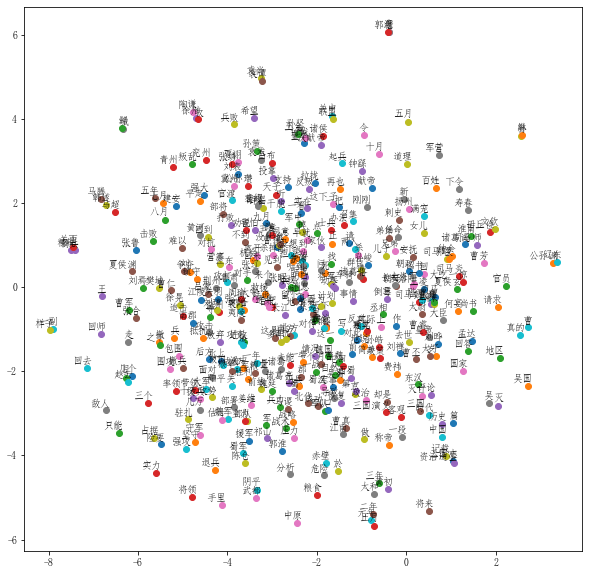

In [16]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import gensim
import matplotlib as mpl


# -*- coding: utf-8 -*-
import pymysql
#getting data
def get_data(sql):
    db = pymysql.connect(host="localhost", user="root",password= "wzq19970405",database= "sanguoyanyi", charset='utf8' )
    cursor = db.cursor()
    cursor.execute(sql)
    results = cursor.fetchall()
    cursor.close()
    db.close()
    return results

mpl.rcParams['font.sans-serif'] = ['FangSong'] # Specify Chinese font
mpl.rcParams['axes.unicode_minus'] = False # Fixed a problem with save images where the minus sign '-' appears as a square

def plot_with_labels(low_dim_embs, labels, filename):   # Draw a word vector map
    assert low_dim_embs.shape[0] >= len(labels), 'More labels than embeddings'
    print('The word vector is being drawn......')
    plt.figure(figsize=(10, 10))  # in inches
    for i, label in enumerate(labels):
        x, y = low_dim_embs[i, :]
        plt.scatter(x, y)	# Draw dots corresponding to each word vector in low_DIM_embs
        plt.annotate(label,	# Shows which word corresponds to each dot
                     xy=(x, y),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.savefig(filename)
    plt.show()

if __name__ == '__main__':
    vectors = []
    words = []
    SQL = "SELECT key_word,`final` FROM key_words WHERE key_words.`final` != ''"
    results = get_data(SQL)
    for row in results:
         value = row[1]
         value = value[1:-1].split(",")
         vectors.append(value)
         words.append(row[0])
    try:
        tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000, method='exact')
        plot_only = 400	# Limit the number of dots 
        low_dim_embs = tsne.fit_transform(vectors[:plot_only]) # The word vector that needs to be displayed
        labels = [words[i] for i in range(plot_only)] # A list of words corresponding to the dot to be displayed
        plot_with_labels(low_dim_embs, labels, 'w2v.png')

    except ImportError as ex:
        print('Please install gensim, sklearn, numpy, matplotlib, and scipy to show embeddings.')
        print(ex)
